# MVP Sprint 1 - Análise Exploratória de Dados (EDA): casas brasileiras para alugar
Conjunto de dados: Kaggle

Trabalho realizado durante a primeira Sprint do Curso de Pós Graduação em Ciência de Dados e Analytics - PUC-RIO

# Definição do problema:

- Os dados vêm de uma competição do Kaggle chamada “brazilian_houses_to_rent” ( https://www.kaggle.com/rubenssjr/brasilian-houses-to-rent ), que é um conjunto de dados de casas para alugar em diferentes cidades do Brasil. Ele contém 10.962 propriedades para alugar e 13 características diferentes que podem nos ajudar a prever o preço do aluguel de uma casa.
- O valor de uma casa é simplesmente mais do que localização e metragem quadrada. Vamos aproveitar as variáveis disponíveis para fazer essa análise.
- Com este estudo, poderemos perceber quais as características (ex. Número de banheiros, localização, etc.) que influenciam no preço do aluguel de uma casa.




O objetivo pretendido neste notebook é:
 - Fazer uma análise exploratória do dataset e poder inferir quais características mais influenciam no preço do aluguel de uma casa, levando em consideração as variáveis disponíveis.

### hipóteses:

- Algumas cidades têm preços de aluguel mais alto;
- A área do imóvel influencia em aluguel mais alto;
- Aceitar animais impacta no valor do aluguel;
- Casas com condomínio mais alto têm aluguel mais alto;
- As casas mobiliadas impacta em aluguel mais elevado;
- O número de vagas de estacionamento impacta no valor do aluguel.
- Casas com maior quantidade de quartos tem o aluguel mais alto;
- Casas com maior quantidade de banheiros tem o aluguel mais alto;
- Qual a diferença de valor de aluguel de uma casa nas mesmas condições, mas no bairro mais caro e no mais barato;
- o quanto um quarto ou um banheiro a mais impacta no valor do aluguel.

### Descrição dos atributos do dataset:
- city -> Cidade onde o imóvel está localizado / City where the property is located
- area -> área do imóvel / Property area
- rooms -> quantidade de quartos/ Quantity of rooms
- bathroom -> quantidade de banheiros / Quantity of bathroom
- parking spaces -> quantidade de vagas de estacionamento / Quantity of parking spaces
- floor -> Andar / Floor
- animal -> Aceita animais? / Acept animals?
- furniture -> Mobiliada? / Furniture?
- hoa -> Valor do condomínio / Homeowners association tax (em real)
- rent amount -> Valor do Aluguel / Rent amount (em real)
- property tax -> IPTU / Property tax (em real)
- fire insurance -> Seguro Incêndio / Fire Insurance (em real)
- total -> Valor total, soma de todos os valores / Total (em real)


# Limpeza e pré-processamento de dados: 

In [124]:
#Importação das bibliotecas necessárias
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [125]:
#Função para formatar a matriz de correlação
def plot_corr_matrix(corr_matrix, size=(14, 14)):
  # Configurando a figura do matplotlib
  fig, ax = plt.subplots(figsize=size)

  # Gerando um mapa de cores divergente personalizado
  cmap = sns.diverging_palette(220, 10, as_cmap=True)

  # Gerando uma máscara para o triângulo superior
  mask = np.triu(np.ones_like(corr_matrix.corr(), dtype=np.bool))

  # Desenhando o mapa de calor com a máscara e a proporção correta
  sns.heatmap(corr_matrix.corr(), mask=mask, cmap=cmap, vmax=.99, center=0,
              square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [126]:
# Criando função para modificar as variáveis com tipo object em categóricas
def mudar_tipo(x):

    if x.dtype == "object":
        return x.astype("category")
    return x

In [127]:
#Leitura do dataset
df_houses = pd.read_csv("houses_to_rent_v2.csv")

In [128]:
# Verificação geral/Primeiras linhas do dataset
df_houses.head()

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
0,São Paulo,70,2,1,1,7,acept,furnished,2065,3300,211,42,5618
1,São Paulo,320,4,4,0,20,acept,not furnished,1200,4960,1750,63,7973
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0,41,3841
3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22,17,1421
4,São Paulo,25,1,1,0,1,not acept,not furnished,0,800,25,11,836


In [129]:
# Verificando o tamanho do dataset (linhas e colunas)
df_houses.shape

(10692, 13)

In [130]:
# Verificando os tipos das variáveis
df_houses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10692 entries, 0 to 10691
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   city                 10692 non-null  object
 1   area                 10692 non-null  int64 
 2   rooms                10692 non-null  int64 
 3   bathroom             10692 non-null  int64 
 4   parking spaces       10692 non-null  int64 
 5   floor                10692 non-null  object
 6   animal               10692 non-null  object
 7   furniture            10692 non-null  object
 8   hoa (R$)             10692 non-null  int64 
 9   rent amount (R$)     10692 non-null  int64 
 10  property tax (R$)    10692 non-null  int64 
 11  fire insurance (R$)  10692 non-null  int64 
 12  total (R$)           10692 non-null  int64 
dtypes: int64(9), object(4)
memory usage: 1.1+ MB


In [131]:
# Verificando valores nulos
df_houses.isnull().sum()

city                   0
area                   0
rooms                  0
bathroom               0
parking spaces         0
floor                  0
animal                 0
furniture              0
hoa (R$)               0
rent amount (R$)       0
property tax (R$)      0
fire insurance (R$)    0
total (R$)             0
dtype: int64

- O dataset não possui valores nulos. Não é porque não temos valores ausentes que não temos valores errados nos dados e quaisquer valores errados podem influenciar nossa análise.

In [132]:
# Verificando a variável floor, por qual motivo está como object?
df_houses[['floor']].value_counts(sort = True)

floor
-        2461
1        1081
2         985
3         931
4         748
5         600
6         539
7         497
8         490
9         369
10        357
11        303
12        257
13        200
14        170
15        147
16        109
17         96
18         75
19         53
20         44
21         42
23         25
25         25
22         24
26         20
24         19
27          8
28          6
29          5
32          2
35          1
46          1
51          1
301         1
dtype: int64

- Aqui, temos dois problemas iniciais. Uma quantidade de dados com um andar indefinido representado por '-' e 1 dado com andar 301. Os dois casos são um problema a ser considerado para a continuação da análise.
- Precisamos também mudar o nome da coluna porque é uma palavra reservada em python.

In [133]:
# Mudando mome da coluna
df_alterado = df_houses.rename(columns={'floor':'floors'})

In [134]:
# Substituindo o andar  representado por '-' por 0
df_alterado['floors'] = df_alterado['floors'].replace(to_replace='-', value=0)

- Vamos levar em consideração que 0 significa casas sem andares (Térreo)

In [135]:
# Mudando o tipo da variável floor para inteiro
df_alterado.floors = df_alterado.floors.astype('int64')

- As casas no Brasil tem no máximo 81 andares, então vamos verificar os valores maiores que 81 andares presente no dataset e retirá-los, pois são dados errados que irão atrapalhar nas análisess.

In [136]:
# Verificando valores maiores que 81 andares
df_andar = (df_alterado['floors'] > 81).sum()
df_andar

1

In [137]:
# Deixando o dataset com andares até 81 
df_alterado = df_alterado.query('floors<=81')

In [138]:
# Verificando a variável floors, após essas modificações
df_alterado[['floors']].value_counts(sort = True)

floors
0         2461
1         1081
2          985
3          931
4          748
5          600
6          539
7          497
8          490
9          369
10         357
11         303
12         257
13         200
14         170
15         147
16         109
17          96
18          75
19          53
20          44
21          42
23          25
25          25
22          24
26          20
24          19
27           8
28           6
29           5
32           2
35           1
46           1
51           1
dtype: int64

In [139]:
# Transformando as variáveis com tipo object em categoricas
df_alterado= df_alterado.apply(lambda x: mudar_tipo(x))

In [140]:
# Verificando valores duplicados
df_alterado.duplicated().sum()

358

- O dataset apresenta 358 valores duplicados, dessa forma, irei retirar esses valores para prosseguir com as análises. 

In [141]:
# Retirando valores duplicados
df_alterado = df_alterado.drop_duplicates()

In [142]:
# Separando as variáveis:
# Variáveis numéricas
vars_num = df_alterado.select_dtypes(include=['int', 'float']).columns.tolist()
print(f'\nVariáveis numéricas({len(vars_num)}): {vars_num}')

# Variáveis categóricas
vars_cat = df_alterado.select_dtypes(exclude=['int', 'float']).columns.tolist()
print(f'\nVariáveis Categóricas({len(vars_cat)}): {vars_cat}')


Variáveis numéricas(10): ['area', 'rooms', 'bathroom', 'parking spaces', 'floors', 'hoa (R$)', 'rent amount (R$)', 'property tax (R$)', 'fire insurance (R$)', 'total (R$)']

Variáveis Categóricas(3): ['city', 'animal', 'furniture']


In [143]:
# Medidas de resumo das variáveis quantitativas
df_alterado.describe(percentiles = [.25, .50, .75, .95, .99], include=['int64', 'float64']).round(2)

,area,rooms,bathroom,parking spaces,floors,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
count,10333.00,10333.00,10333.00,10333.00,10333.00,10333.00,10333.00,10333.00,10333.00,10333.00
mean,152.45,2.54,2.27,1.64,5.07,1091.28,3966.43,376.95,54.27,5489.13
std,545.90,1.17,1.41,1.60,5.32,11446.65,3436.33,3160.75,48.17,12669.71
min,11.00,1.00,1.00,0.00,0.00,0.00,450.00,0.00,3.00,499.00
25%,59.00,2.00,1.00,1.00,1.00,180.00,1598.00,41.00,21.00,2116.00
50%,95.00,3.00,2.00,1.00,3.00,571.00,2750.00,130.00,37.00,3686.00
75%,190.00,3.00,3.00,2.00,8.00,1287.00,5000.00,390.00,70.00,6913.00
95%,400.00,4.00,5.00,5.00,16.00,3200.00,12000.00,1398.80,162.00,15244.00
99%,660.00,6.00,6.00,8.00,22.00,5048.28,15000.00,2723.96,226.00,20531.20
max,46335.00,13.00,10.00,12.00,51.00,1117000.00,45000.00,313700.00,677.00,1120000.00


- Verificando as medidas de resumo, podemos perceber valores discrepantes presentes em algumas colunas. Vamos explorar mais um pouco pra entender melhor e tomar uma decisão.

In [144]:
# Analisando os valores maiores que 50000 presentes na variável 'total (R$)'
big_price = df_alterado[df_alterado['total (R$)'] > 50000]
big_price

,city,area,rooms,bathroom,parking spaces,floors,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
255,Belo Horizonte,155,1,4,0,4,not acept,not furnished,1117000,2790,64,38,1120000
2182,São Paulo,700,4,7,8,0,acept,not furnished,0,45000,8750,677,54430
2859,São Paulo,285,4,5,4,6,acept,furnished,200000,20000,1834,254,222100
2928,Rio de Janeiro,35,1,1,0,1,acept,furnished,81150,4500,9900,58,95610
6230,São Paulo,340,5,4,2,7,acept,not furnished,220000,12000,1000,153,233200
6645,São Paulo,42,1,2,1,6,not acept,not furnished,690,2500,313700,32,316900


- Na coluna Total, existem 6 valores muito discrepantes que podem induzir a uma análise errada. Optarei por retirar esses valores da análise.

In [145]:
# Retirando os valores encontrados
df_alterado = df_alterado.drop(big_price.index)

In [146]:
# Analisando os valores maiores que 100000 presentes na variável 'property tax (R$)'
big_prop = df_alterado[df_alterado['property tax (R$)'] > 30000]
big_prop

,city,area,rooms,bathroom,parking spaces,floors,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)


In [147]:
# Analisando os valores maiores que 100000 presentes na variável 'hoa (R$)'
big_hoa = df_alterado[df_alterado['hoa (R$)'] > 100000]
big_hoa

,city,area,rooms,bathroom,parking spaces,floors,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)


- Quando retiramos os valores discrepantes da variável 'total (R$)', também resolvemos o problema nas demais variáveis acima.

In [148]:
# Analisando os valores maiores que 20.000 m2 presentes na variável 'area'
big_area = df_alterado[df_alterado['area'] > 20000]
big_area

,city,area,rooms,bathroom,parking spaces,floors,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
2397,Belo Horizonte,46335,4,8,5,11,acept,furnished,960,8500,646,114,10220
5915,São Paulo,24606,5,4,4,12,acept,not furnished,2254,8100,7859,103,18320


Ainda ficamos com valores estranhos para a variável 'area', então vamos retirar esses dois valores encontrados com área maior que 20.000 m2.

In [149]:
# Retirando os valores encontrados
df_alterado = df_alterado.drop(big_area.index)

In [150]:
# Verificando medidas de resumo após as retiradas
df_alterado.describe(percentiles = [.25, .50, .75, .95, .99], include=['int64', 'float64']).round(2)

,area,rooms,bathroom,parking spaces,floors,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
count,10325.00,10325.00,10325.00,10325.00,10325.00,10325.00,10325.00,10325.00,10325.00,10325.00
mean,145.54,2.54,2.27,1.64,5.07,935.02,3959.49,343.95,54.17,5292.82
std,183.43,1.17,1.41,1.60,5.33,1179.19,3408.70,683.17,47.74,4504.97
min,11.00,1.00,1.00,0.00,0.00,0.00,450.00,0.00,3.00,499.00
25%,59.00,2.00,1.00,1.00,1.00,180.00,1590.00,40.00,21.00,2114.00
50%,95.00,3.00,2.00,1.00,3.00,570.00,2750.00,130.00,37.00,3683.00
75%,190.00,3.00,3.00,2.00,8.00,1285.00,5000.00,386.00,70.00,6903.00
95%,400.00,4.00,5.00,5.00,16.00,3200.00,12000.00,1375.00,162.00,15228.00
99%,650.76,6.00,6.00,8.00,22.00,5000.00,15000.00,2703.04,226.00,20287.60
max,12732.00,13.00,10.00,12.00,51.00,32000.00,30000.00,28120.00,451.00,32750.00


### Análise Exploratória

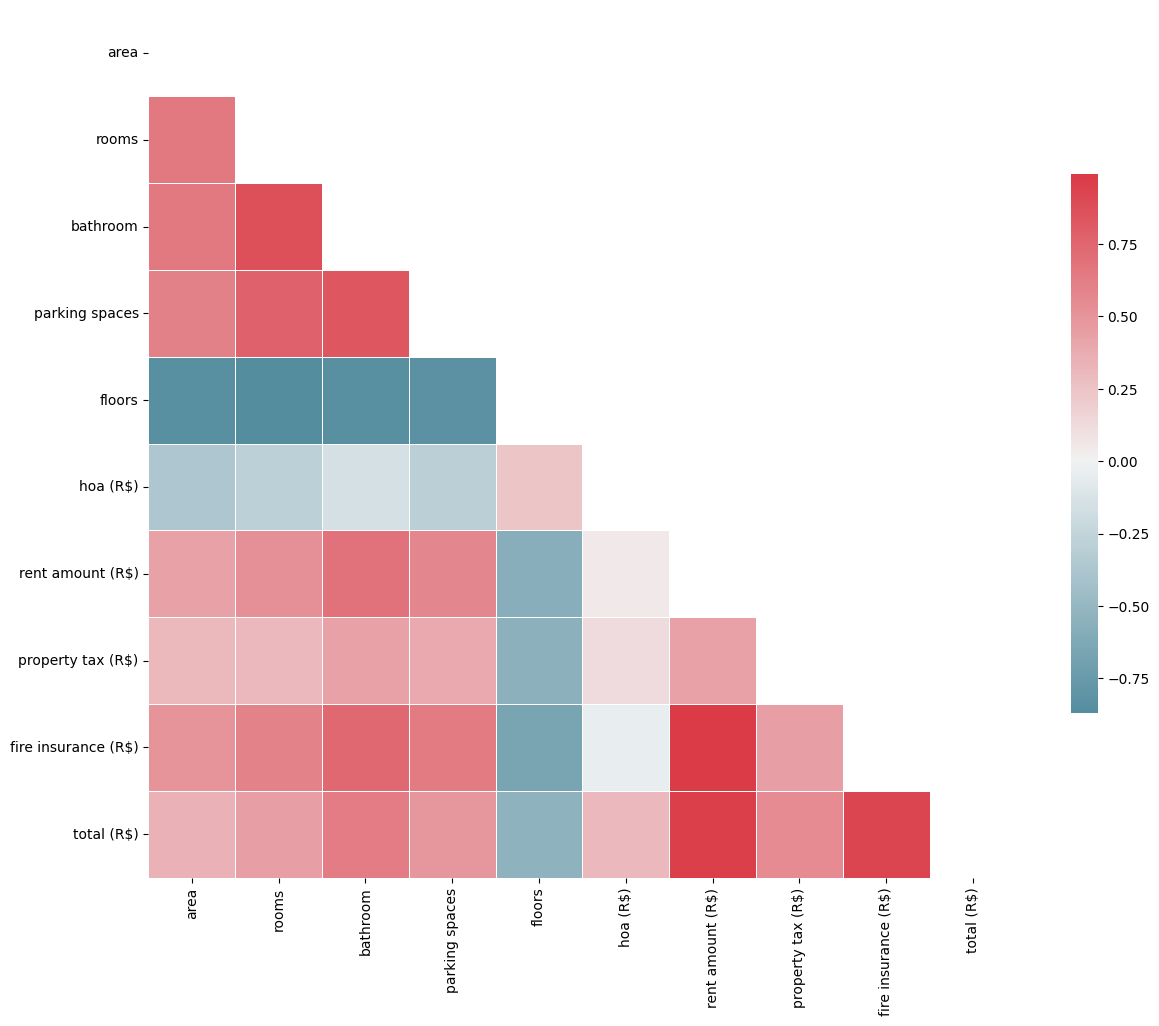

In [151]:
# Verificando correlação entre as variáveis 
corr_matrix = df_alterado[vars_num].corr()
plot_corr_matrix(corr_matrix)

- Por meio da matrix de correlação podemos perceber uma maior correlação positiva do andar (floor) tanto para aluguel (rent amount) como para o valor final da casa (total). 
- Podemos perceber também que a variável 'floor' tem uma grande correlação com boa parte das demais variáveis do dataset.

In [152]:
#Verificando a cardinalidade das variáveis categóricas
print('Cardinalidade médias das categóricas:', np.mean(df_alterado[vars_cat].nunique()))
df_alterado[vars_cat].nunique().sort_values(ascending=False)

Cardinalidade médias das categóricas: 3.0


city         5
animal       2
furniture    2
dtype: int64

- Aqui podemos ver que estamos trabalhando com variáveis categóricas com pouca cardinalidade.

In [153]:
# Verificando a quantidade de cidades 
df_alterado['city'].unique()

['São Paulo', 'Porto Alegre', 'Rio de Janeiro', 'Campinas', 'Belo Horizonte']
Categories (5, object): ['Belo Horizonte', 'Campinas', 'Porto Alegre', 'Rio de Janeiro', 'São Paulo']

- Temos 5 cidades brasileiras onde as casas estão localizadas.

<Axes: xlabel='rent amount (R$)', ylabel='Density'>

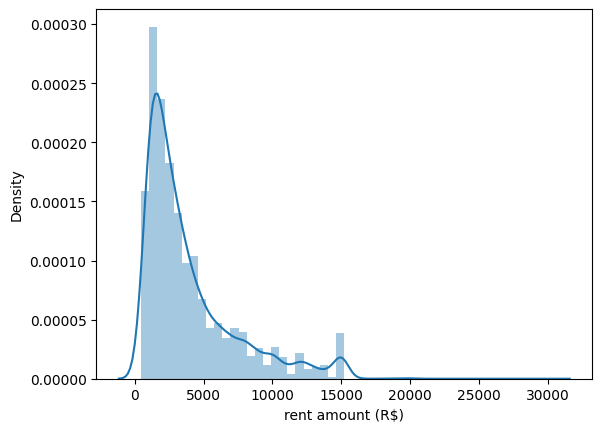

In [154]:
# Distribuição do valor do aluguel das casas 
sns.distplot(df_alterado['rent amount (R$)'])

-  Os valores de aluguel variam até 15.000,00, com uma concentração maior em torno de 2.500,00

<Axes: xlabel='city', ylabel='count'>

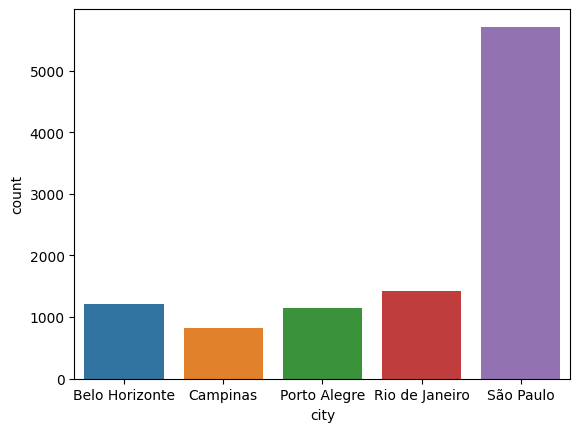

In [155]:
# Quantidade de casas por cidade
sns.countplot(data=df_alterado, x="city")

-  A cidade de São Paulo é onde se concentram a maior quantidade de casas.

<Axes: xlabel='floors', ylabel='count'>

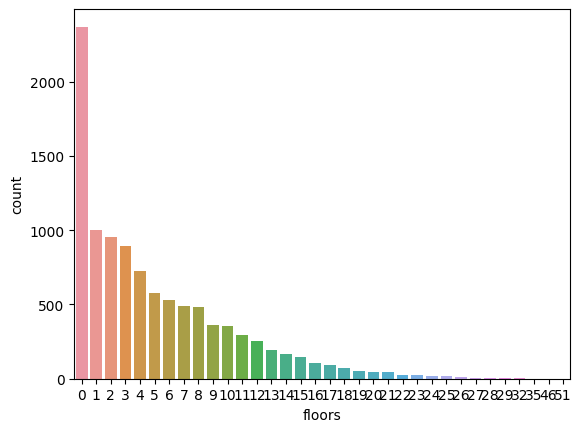

In [156]:
# Quantidade de casas por andar
sns.countplot(data=df_alterado, x="floors")

- A concentração maior está em casas sem andares (térreo), seguido de uma variação entre 1 a 12, diminuindo consideravelmente.

<Axes: xlabel='animal', ylabel='count'>

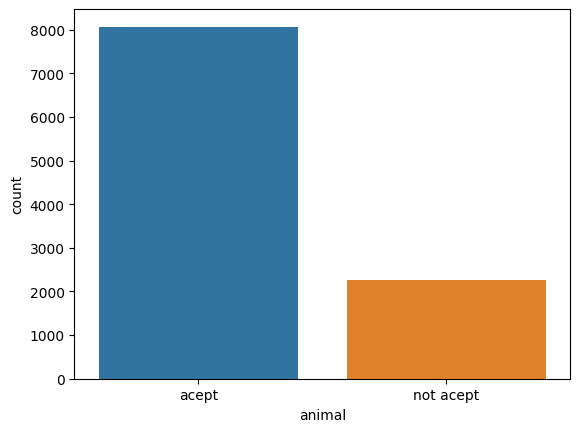

In [157]:
# Quantidade de casas que acetam animal ou não
sns.countplot(data=df_alterado, x="animal")

- A maioria das casas aceitam animais

<Axes: xlabel='city', ylabel='rent amount (R$)'>

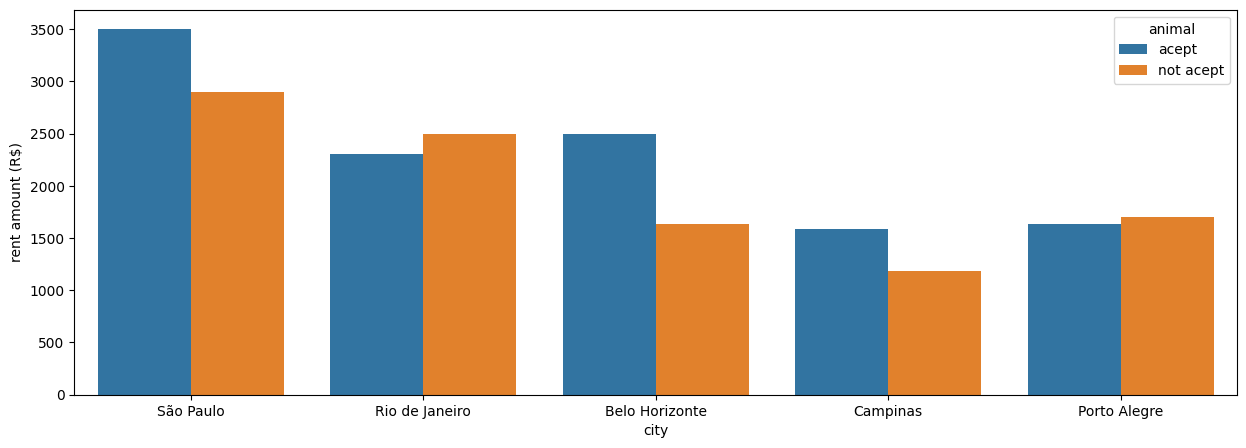

In [158]:
# Comparação do valor do aluguel nas diferentes cidades levando em consideração aceitar ou não animais.
plt.figure(figsize= (15,5))
sns.barplot(x= df_houses['city'], y= df_houses['rent amount (R$)'],hue=df_houses['animal'],ci= False,estimator= np.median,order=["São Paulo", 'Rio de Janeiro','Belo Horizonte','Campinas','Porto Alegre'])

- Aqui, podemos perceber que nem todas as cidades tem o preço mais elevado do aluguel por aceitar animais, como vemos na cidade do Rio de Janeiro e de Porto Alegre. 

<Axes: xlabel='furniture', ylabel='count'>

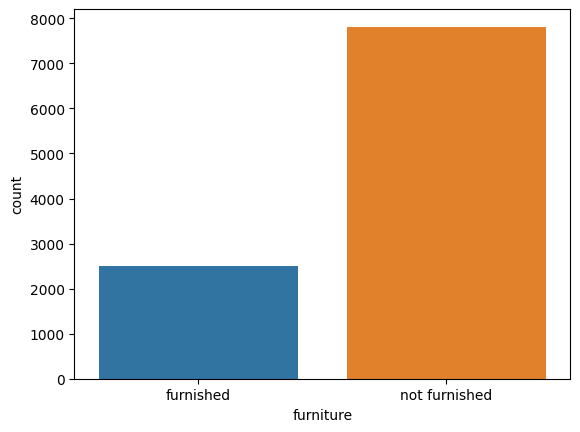

In [159]:
# Quantidade de casas com mobília ou não
sns.countplot(data=df_alterado, x="furniture")

- A maioria das casas não tem mobília.

In [160]:
# Média do aluguel das casas com e sem mobília
df_alterado.groupby('furniture')['rent amount (R$)'].mean().sort_values(ascending = False).round(2)

furniture
furnished        4970.72
not furnished    3634.36
Name: rent amount (R$), dtype: float64

<Figure size 1500x600 with 0 Axes>

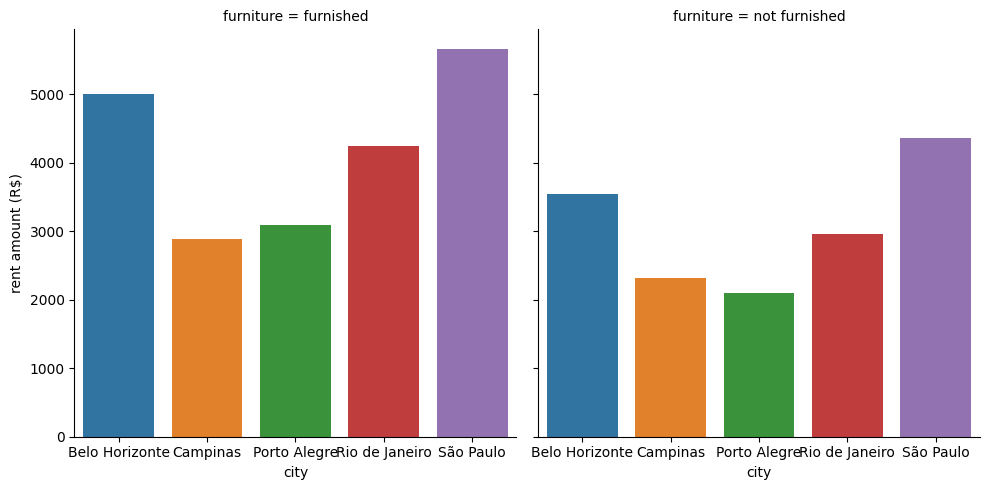

In [161]:

plt.figure(figsize=(15,6))
sns.catplot(x='city',y ='rent amount (R$)',col = 'furniture',kind= 'bar',ci= False,data= df_alterado)

- As casas mobiliadas tem um valor de aluguel maior em média 1.336,00 reais mais caro.

<Axes: xlabel='city', ylabel='rent amount (R$)'>

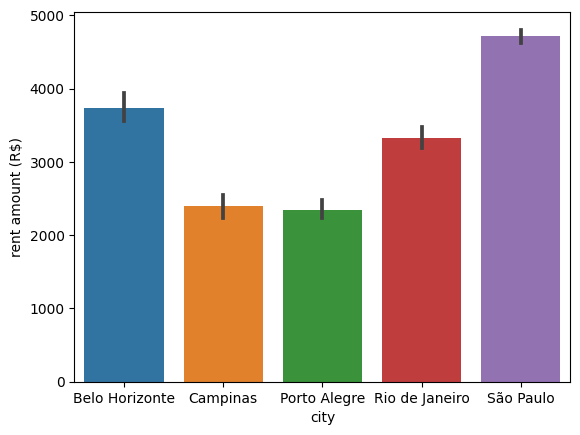

In [162]:
# Valores de alugueis das casas por cidade
sns.barplot(data=df_alterado, x='city', y='rent amount (R$)')

In [163]:
# Média do valor total por cidade
df_alterado.groupby('city')['total (R$)'].median().sort_values(ascending=False)

city
São Paulo         4695.5
Rio de Janeiro    3417.0
Belo Horizonte    3127.5
Porto Alegre      2183.0
Campinas          2147.0
Name: total (R$), dtype: float64

<Axes: xlabel='city', ylabel='total (R$)'>

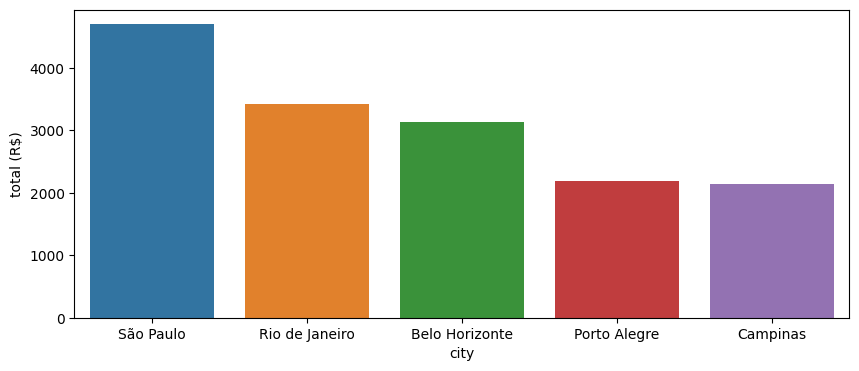

In [164]:
# Média do valor total por cidade
plt.figure(figsize=(10,4))
sns.barplot(x=df_alterado['city'], y=df_alterado['total (R$)'], ci=False, estimator=np.median, order= ('São Paulo','Rio de Janeiro','Belo Horizonte','Porto Alegre', 'Campinas'))

-  Algumas cidades têm preços mais altos, como podemos observar em São Paulo, Rio de Janeiro e Belo Horizonte

In [165]:
# Valor médio do aluguel em relação a quantidade de vagas de estacionamento
df_alterado.groupby('parking spaces')['rent amount (R$)'].mean().sort_values(ascending = False)

parking spaces
7     9486.363636
10    8950.000000
6     8867.846626
8     8406.819672
5     8324.480176
4     7738.373248
12    6900.000000
3     6437.618257
2     4540.290607
1     2625.650172
0     2187.701367
Name: rent amount (R$), dtype: float64

<Axes: xlabel='parking spaces', ylabel='rent amount (R$)'>

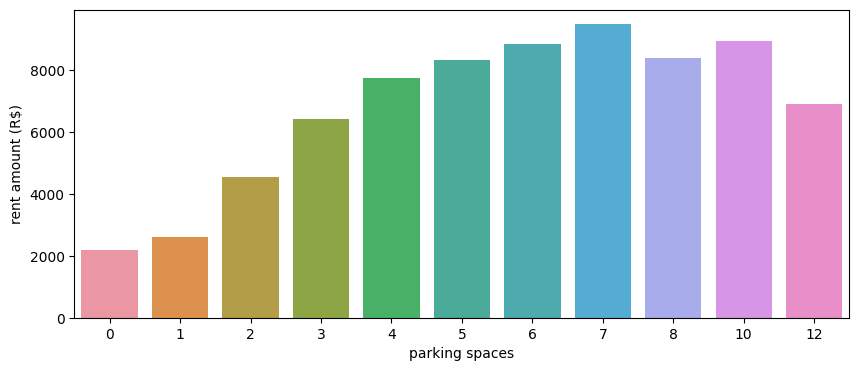

In [166]:
# Valor médio do aluguel em relação a quantidade de vagas de estacionamento
plt.figure(figsize=(10,4))
sns.barplot(x= 'parking spaces', y= 'rent amount (R$)', data= df_alterado, ci= False)

- Podemos notar que de 0 a 7 a quantidade de vagas impacta nos preços, quanto mais vagas, mais caros são os imóveis, a partir de 8 vagas não temos esse padrão.

In [167]:
# Valor médio do aluguel em relação a quantidade de quartos 
df_alterado.groupby('rooms')['rent amount (R$)'].mean().sort_values(ascending = False)

rooms
13    15000.000000
9     12000.000000
8      9872.727273
7      8865.277778
10     8243.333333
5      8215.245614
6      7466.397059
4      7130.031706
3      4500.641907
2      2490.937196
1      2057.694170
Name: rent amount (R$), dtype: float64

<Axes: xlabel='rooms', ylabel='rent amount (R$)'>

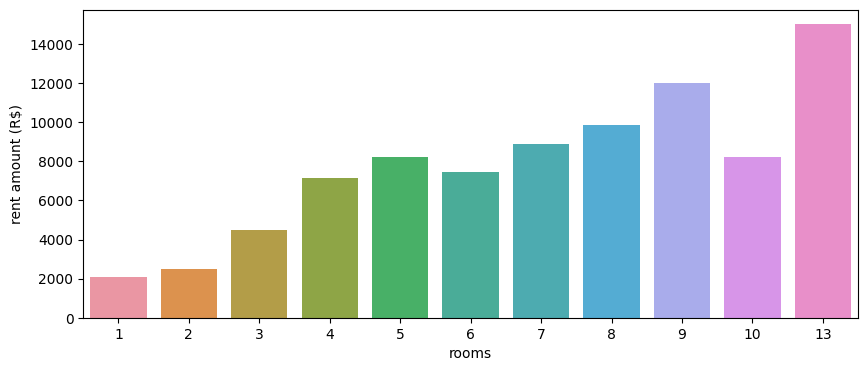

In [168]:
# Valor médio do aluguel em relação a quantidade de quartos
plt.figure(figsize=(10,4))
sns.barplot(x= 'rooms', y= 'rent amount (R$)', data= df_alterado, ci= False)

- Podemos notar que a quantidade de quartos impacta nos preços, quanto mais quartos, mais caros são os imóveis, somente quando temos 10 quartos não temos esse padrão.

In [169]:
# Valor médio do aluguel em relação a quantidade de banheiros
df_alterado.groupby('bathroom')['rent amount (R$)'].mean().sort_values(ascending = False)

bathroom
8     12842.000000
10    12333.333333
9     10092.250000
7      9957.785714
6      9156.613953
5      8367.635253
4      7186.007233
3      5442.573590
2      3390.470424
1      1873.188106
Name: rent amount (R$), dtype: float64

<Axes: xlabel='bathroom', ylabel='rent amount (R$)'>

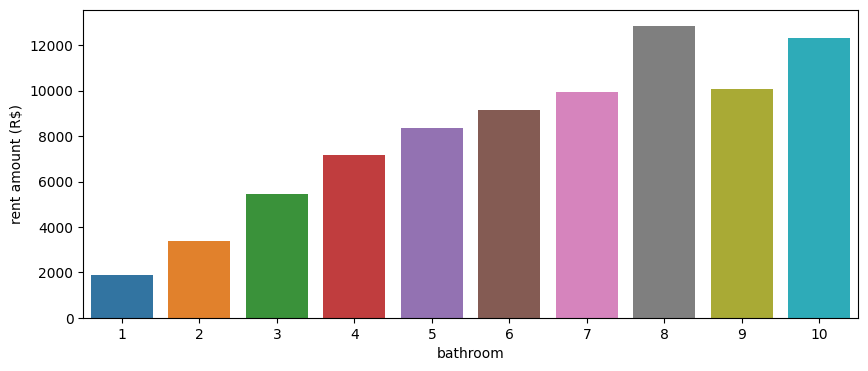

In [170]:
# Valor médio do aluguel em relação a quantidade de banheiros
plt.figure(figsize=(10,4))
sns.barplot(x= 'bathroom', y= 'rent amount (R$)', data= df_alterado, ci= False)

- Podemos notar que de 0 a 8 banheiros a quantidade de impacta nos preços, quanto mais banheiros, mais caros são os imóveis, após isso não temos esse padrão.

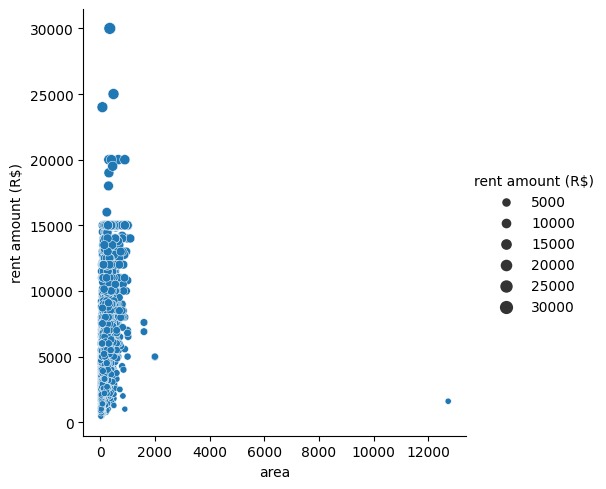

In [171]:
#Area vs Aluguel
sns.relplot(x = 'area',y='rent amount (R$)',data=df_alterado,kind='scatter',size='rent amount (R$)')

- Analisando a área em relação ao valor do aluguel, percebemos uma concentração de valores até 15.000 reias com área até 2.000 m2.
- Percebemos também um ponto fora da curva, que pode representar um outlier ou mesmo uma casa fora dos padrões tradicionais encontrados no dataset.

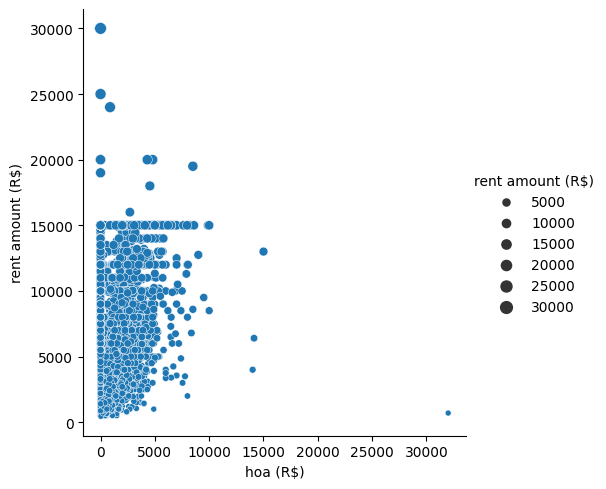

In [172]:
#Valor do condomínio vs valor do aluguel
sns.relplot(x = 'hoa (R$)',y='rent amount (R$)',data=df_alterado,kind='scatter',size='rent amount (R$)')

- O valor do condomínio tem um variação de até 5.000 para alugueis de até 15.000 reias.
- Observamos também valores fora desse padrão.

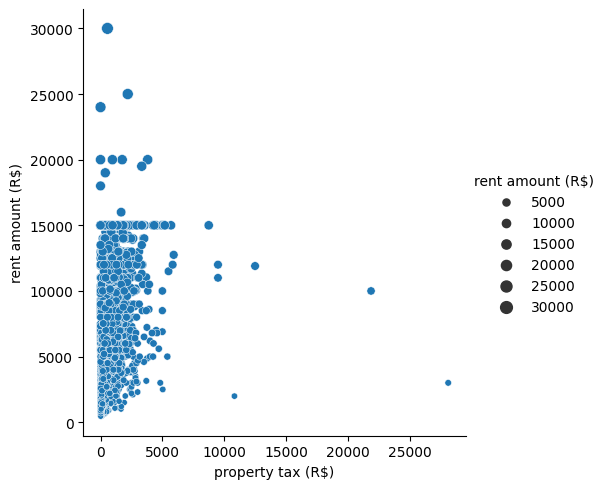

In [173]:
#Valor do IPTU vs valor do aluguel
sns.relplot(x = 'property tax (R$)',y='rent amount (R$)',data=df_alterado,kind='scatter',size='rent amount (R$)')

- Os valores do IPTU ficam abaixo de 5.000 reias.

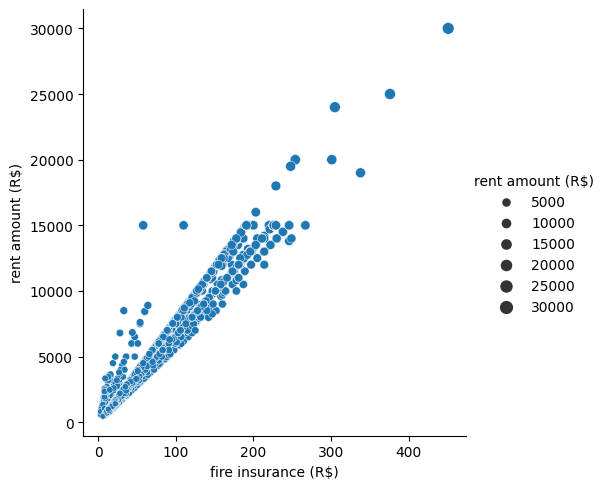

In [174]:
#Valor do seguro incêndio vs valor do aluguel
sns.relplot(x = 'fire insurance (R$)',y='rent amount (R$)',data=df_alterado,kind='scatter',size='rent amount (R$)')

- Já em relação ao seguro incêndio, segue a regra, quanto maior o valor do aluguel da casa, maior o valor do seguro incêndio.

### Comparando casas com mesmo padrão, na cidade mais cara e mais barata

In [175]:
# Verificando a média de banheiros
media_banheiros = df_alterado['bathroom'].mean()
media_banheiros

2.2671186440677964

In [176]:
# Verificando a média de quartos
media_quartos = df_alterado['rooms'].mean()
media_quartos

2.5394673123486684

In [177]:
# Filtro de casas com 3 quartos e 2 banheiros
filtro_padrao = df_alterado.query('rooms==3 & bathroom==2')

filtro_padrao

,city,area,rooms,bathroom,parking spaces,floors,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
22,São Paulo,160,3,2,2,18,acept,furnished,1530,1900,167,25,3622
24,Rio de Janeiro,90,3,2,1,7,acept,not furnished,800,1800,118,24,2742
28,Campinas,208,3,2,4,0,acept,not furnished,0,3180,100,48,3328
37,Belo Horizonte,80,3,2,1,0,acept,not furnished,0,11000,425,181,11610
41,São Paulo,240,3,2,3,0,acept,not furnished,0,3500,292,53,3845
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10664,Rio de Janeiro,310,3,2,0,5,not acept,not furnished,2500,6000,595,78,9173
10673,Porto Alegre,220,3,2,2,15,acept,not furnished,842,2400,117,36,3395
10675,Rio de Janeiro,250,3,2,1,11,acept,not furnished,2000,2700,500,35,5235
10682,Porto Alegre,160,3,2,3,4,acept,furnished,850,3300,220,49,4419


In [178]:
# Filtro de casas com 3 quartos e 2 banheiros em São Paulo (cidade mais cara)
filtro1 = df_alterado.loc[((df_alterado.rooms==3) & (df_alterado.bathroom==2) & (df_alterado.city=='São Paulo'))].mean().round(2)
filtro1

area                    134.95
rooms                     3.00
bathroom                  2.00
parking spaces            1.73
floors                    5.73
hoa (R$)                965.64
rent amount (R$)       4039.17
property tax (R$)       285.20
fire insurance (R$)      54.07
total (R$)             5344.14
dtype: float64

In [179]:
# Filtro de casas com 3 quartos e 2 banheiros em Camppinas (cidade mais barata)
filtro2 = df_alterado.loc[((df_alterado.rooms==3) & (df_alterado.bathroom==2) & (df_alterado.city=='Campinas'))].mean().round(2)
filtro2

area                    208.19
rooms                     3.00
bathroom                  2.00
parking spaces            1.74
floors                    5.24
hoa (R$)                615.15
rent amount (R$)       1993.88
property tax (R$)       135.60
fire insurance (R$)      26.75
total (R$)             2771.37
dtype: float64

- Aqui, observamos que a diferença de valor de aluguel de uma casa com a mesma quantidade de quartos e banheiros aumenta em média 2.045,00,considerando a cidade mais cara e mais barata.  Um valor bastante espressivo.

In [180]:
# Aumentando 1 quarto na cidade mais cara (São paulo)
filtro3 = df_alterado.loc[((df_alterado.rooms==4) & (df_alterado.bathroom==2) & (df_alterado.city=='São Paulo'))].mean().round(2)
filtro3

area                    229.36
rooms                     4.00
bathroom                  2.00
parking spaces            2.79
floors                    2.79
hoa (R$)                871.66
rent amount (R$)       5647.36
property tax (R$)       433.84
fire insurance (R$)      79.75
total (R$)             7032.59
dtype: float64

- Aqui, observamos que a diferença de valor de aluguel de uma casa na mesma cidade, aumentando apenas um quarto, temos um aumento em média de 1.608,00. Mais uma vez, um valor bem considerável.

In [181]:
# Aumentando 1 banheiro na cidade mais cara (São paulo)
filtro4 = df_alterado.loc[((df_alterado.rooms==3) & (df_alterado.bathroom==3) & (df_alterado.city=='São Paulo'))].mean().round(2)
filtro4

area                    187.18
rooms                     3.00
bathroom                  3.00
parking spaces            2.38
floors                    5.25
hoa (R$)               1302.66
rent amount (R$)       5656.54
property tax (R$)       473.46
fire insurance (R$)      76.32
total (R$)             7509.74
dtype: float64

- Aqui, observamos que a diferença de valor de aluguel de uma casa na mesma cidade, aumentando apenas um banheiro, temos um aumento em média de 1.617,00. Mais uma vez, um valor bem considerável.

### Considerações finais:

- Com as análises feitas, pudemos observar melhor o comportamento dos dados e conseguimos explorar os fatores que influenciam ou não nos preços do aluguel das casas nessas 5 cidades brasileiras. É clao que seria possível responder diversas outras perguntas e fazer várias outras observações. 
- Conseguimos responder as hipóteses iniciais propostas nesse estudo:
  - Temos algumas cidades que tem aluguel mais caro que outras;
  - Casas com mobília realmente tem aluguel mais caro também;
  - Nem todas as cidades seguem o padrão de serem mais caras por aceitarem animais;
  - Os preços de aluguel aumentam até determinada quantidade de vagas de garagem ou quantidade de andares;
  - Temos uma diferença bastante considerável por ter mais um quarto em uma casa na mesma cidade;
  - Temos uma diferença bastante considerável por ter mais um quarto em uma casa na mesma cidade;
  - Temos uma diferença bastante considerável em uma casa com mesma quantidade de quartos e banheiros mudando a cidade onde está localizada;
- Esse estudo poderia ser complementado com mais análises e com aplicação de modelos de Machine Learning utilizados para prever os valores dos alugueis das casas em relação a tudo que foi observado e assim poder servir como um modelo que receberia novas variáveis e poderia nos dar o valor estimado do aluguel dela.